## Learning Data Augmentation

In [1]:
%matplotlib inline
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torchvision

import datasets
import autoencoder
import cnn
import vae
import utils

## Dataset

Files already downloaded and verified
Files already downloaded and verified


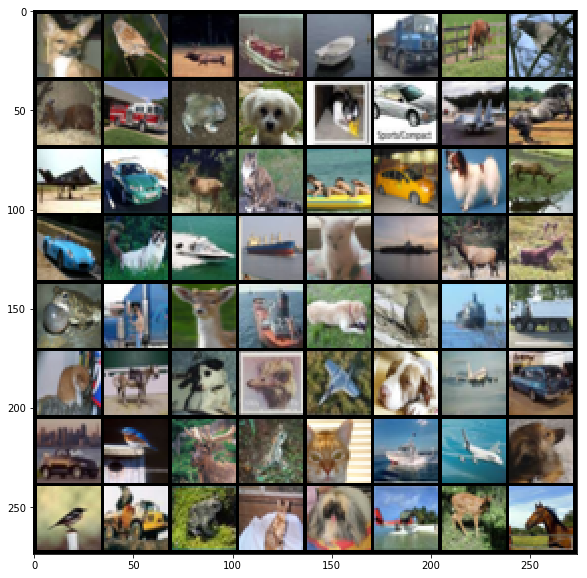

(5000, 5000, torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [2]:
trn_loader, tst_loader = datasets.get_cifar_loader(bs=64, trn_size=5000, tst_size=5000)
inputs,targets = next(iter(trn_loader))
utils.plot_batch(inputs)
len(trn_loader.dataset), len(tst_loader.dataset), inputs.size(), targets.size()

## Classifier

In [3]:
model = cnn.CNN(in_shape=(3,32,32), n_classes=10).cuda()

In [4]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
trainer = cnn.Trainer()

In [5]:
trainer.run(model, trn_loader, tst_loader, criterion, optimizer, epochs=10)

Epoch 1, TrnLoss: 2.159, TrnAcc: 0.335, TstLoss: 2.065, TstAcc: 0.414
Epoch 2, TrnLoss: 2.033, TrnAcc: 0.452, TstLoss: 2.016, TstAcc: 0.454
Epoch 3, TrnLoss: 1.970, TrnAcc: 0.514, TstLoss: 1.996, TstAcc: 0.474
Epoch 4, TrnLoss: 1.911, TrnAcc: 0.576, TstLoss: 1.969, TstAcc: 0.502
Epoch 5, TrnLoss: 1.861, TrnAcc: 0.627, TstLoss: 1.938, TstAcc: 0.536
Epoch 6, TrnLoss: 1.829, TrnAcc: 0.656, TstLoss: 1.927, TstAcc: 0.547
Epoch 7, TrnLoss: 1.781, TrnAcc: 0.710, TstLoss: 1.925, TstAcc: 0.536
Epoch 8, TrnLoss: 1.759, TrnAcc: 0.725, TstLoss: 1.913, TstAcc: 0.555
Epoch 9, TrnLoss: 1.733, TrnAcc: 0.749, TstLoss: 1.910, TstAcc: 0.555
Epoch 10, TrnLoss: 1.716, TrnAcc: 0.766, TstLoss: 1.896, TstAcc: 0.569


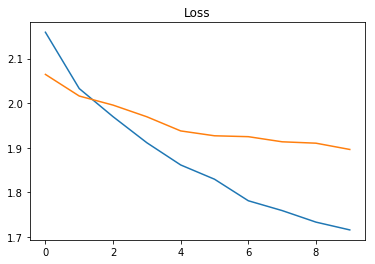

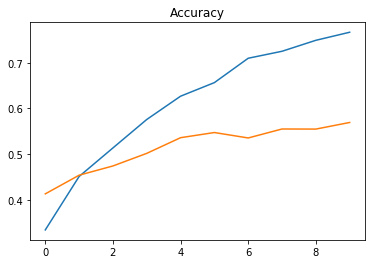

In [6]:
utils.plot_metric(trainer.metrics['loss']['trn'], trainer.metrics['loss']['tst'], 'Loss')
utils.plot_metric(trainer.metrics['accuracy']['trn'], trainer.metrics['accuracy']['tst'], 'Accuracy')

## Autoencoder

In [7]:
model = autoencoder.AE(in_shape=(3,32,32)).cuda()

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

Epoch 1 Loss: 0.0595


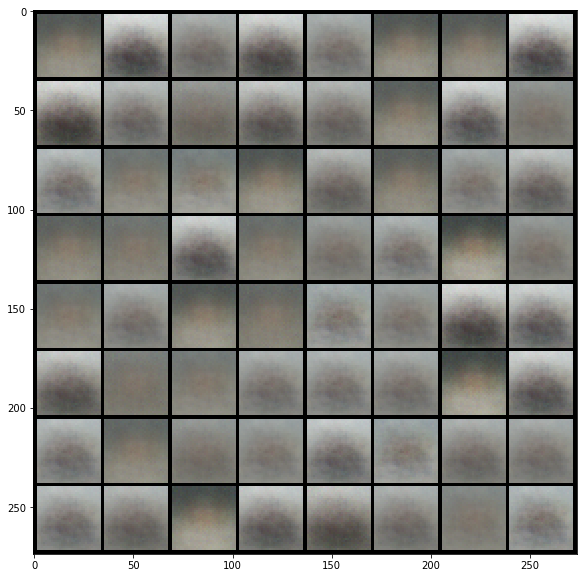

Epoch 2 Loss: 0.0402
Epoch 3 Loss: 0.0377
Epoch 4 Loss: 0.0376
Epoch 5 Loss: 0.0375
Epoch 6 Loss: 0.0374
Epoch 7 Loss: 0.0373
Epoch 8 Loss: 0.0357
Epoch 9 Loss: 0.0339
Epoch 10 Loss: 0.0335
Epoch 11 Loss: 0.0336
Epoch 12 Loss: 0.0334
Epoch 13 Loss: 0.0334
Epoch 14 Loss: 0.0335
Epoch 15 Loss: 0.0334
Epoch 16 Loss: 0.0333
Epoch 17 Loss: 0.0333
Epoch 18 Loss: 0.0333
Epoch 19 Loss: 0.0332
Epoch 20 Loss: 0.0332


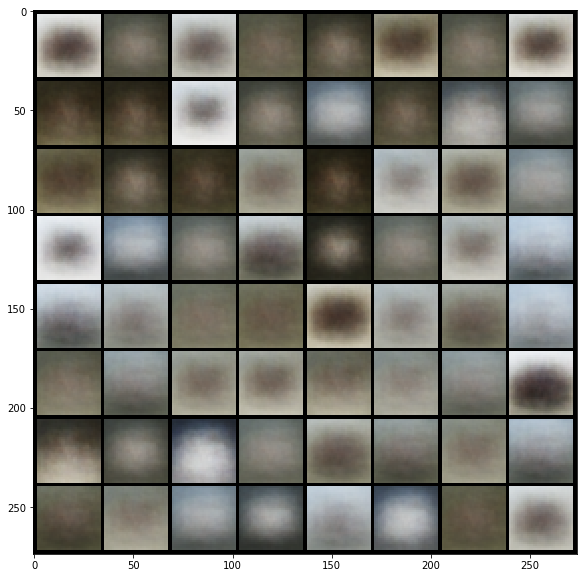

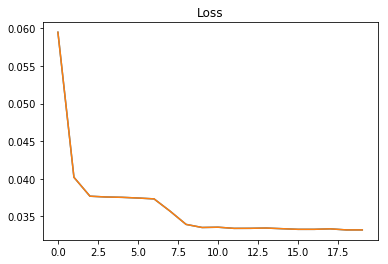

In [9]:
losses = autoencoder.run(model, trn_loader, criterion, optimizer, epochs=20)
utils.plot_metric(losses, losses, 'Loss')

## Conv Autoencoder

In [10]:
model = autoencoder.ConvAE(in_shape=(3,32,32)).cuda()

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

Epoch 1 Loss: 0.0495


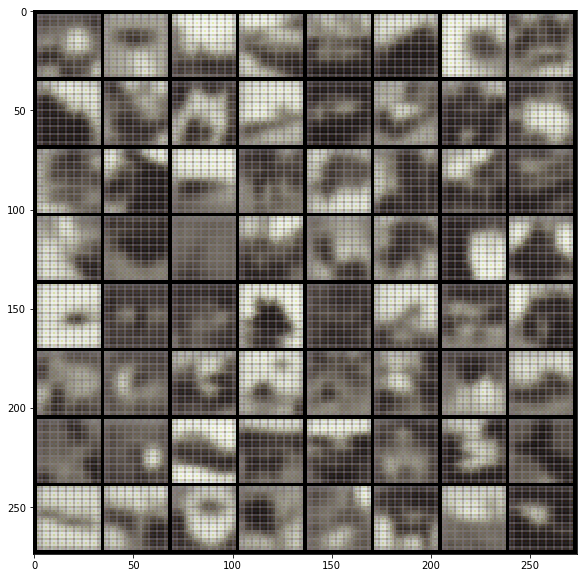

Epoch 2 Loss: 0.0189
Epoch 3 Loss: 0.0163
Epoch 4 Loss: 0.0149
Epoch 5 Loss: 0.0138
Epoch 6 Loss: 0.0133
Epoch 7 Loss: 0.0127
Epoch 8 Loss: 0.0123
Epoch 9 Loss: 0.0116
Epoch 10 Loss: 0.0104
Epoch 11 Loss: 0.0088
Epoch 12 Loss: 0.0082
Epoch 13 Loss: 0.0079
Epoch 14 Loss: 0.0077
Epoch 15 Loss: 0.0075
Epoch 16 Loss: 0.0074
Epoch 17 Loss: 0.0072
Epoch 18 Loss: 0.0071
Epoch 19 Loss: 0.0070
Epoch 20 Loss: 0.0069
Epoch 21 Loss: 0.0069
Epoch 22 Loss: 0.0068
Epoch 23 Loss: 0.0068
Epoch 24 Loss: 0.0067
Epoch 25 Loss: 0.0066
Epoch 26 Loss: 0.0066
Epoch 27 Loss: 0.0065
Epoch 28 Loss: 0.0065
Epoch 29 Loss: 0.0065
Epoch 30 Loss: 0.0064
Epoch 31 Loss: 0.0064
Epoch 32 Loss: 0.0064
Epoch 33 Loss: 0.0063
Epoch 34 Loss: 0.0063
Epoch 35 Loss: 0.0063
Epoch 36 Loss: 0.0062
Epoch 37 Loss: 0.0062
Epoch 38 Loss: 0.0062
Epoch 39 Loss: 0.0061
Epoch 40 Loss: 0.0061
Epoch 41 Loss: 0.0061
Epoch 42 Loss: 0.0061
Epoch 43 Loss: 0.0060
Epoch 44 Loss: 0.0060
Epoch 45 Loss: 0.0060
Epoch 46 Loss: 0.0060
Epoch 47 Loss: 0.0

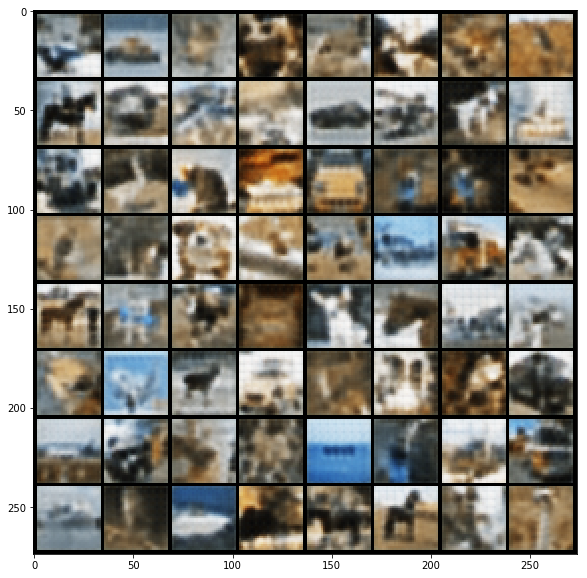

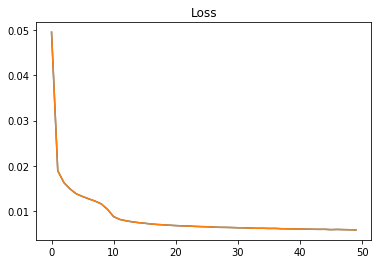

In [12]:
losses = autoencoder.run(model, trn_loader, criterion, optimizer, epochs=50)
utils.plot_metric(losses, losses, 'Loss')

## Conv VAE

In [13]:
model = vae.VAE(in_shape=(3,32,32), n_latent=20).cuda()

In [14]:
criterion = nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

Epoch 1 Loss: 10153.6737


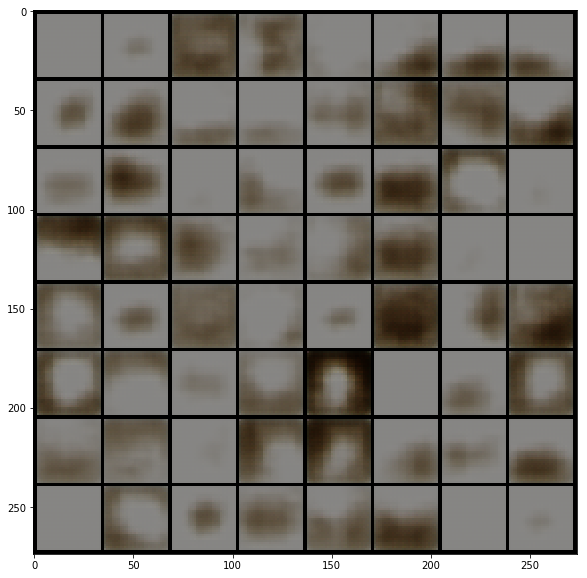

Epoch 2 Loss: 6552.4288
Epoch 3 Loss: 4626.6977
Epoch 4 Loss: 4167.6437
Epoch 5 Loss: 3631.1618
Epoch 6 Loss: 3365.9145
Epoch 7 Loss: 3272.5853
Epoch 8 Loss: 3188.6246
Epoch 9 Loss: 3147.2583
Epoch 10 Loss: 3145.7206
Epoch 11 Loss: 3093.7512
Epoch 12 Loss: 3072.3238
Epoch 13 Loss: 3053.8947
Epoch 14 Loss: 3051.0960
Epoch 15 Loss: 3032.9092
Epoch 16 Loss: 3015.8339
Epoch 17 Loss: 2997.1490
Epoch 18 Loss: 2990.3180
Epoch 19 Loss: 2976.9034
Epoch 20 Loss: 2967.1224
Epoch 21 Loss: 2968.9028
Epoch 22 Loss: 2965.7603
Epoch 23 Loss: 2930.2895
Epoch 24 Loss: 2928.0747
Epoch 25 Loss: 2915.5119
Epoch 26 Loss: 2947.1617
Epoch 27 Loss: 2888.1260
Epoch 28 Loss: 2890.1469
Epoch 29 Loss: 2882.5846
Epoch 30 Loss: 2868.0602
Epoch 31 Loss: 2877.2987
Epoch 32 Loss: 2842.1693
Epoch 33 Loss: 2838.2375
Epoch 34 Loss: 2826.3365
Epoch 35 Loss: 2842.9047
Epoch 36 Loss: 2808.4861
Epoch 37 Loss: 2808.8015
Epoch 38 Loss: 2799.3397
Epoch 39 Loss: 2806.3836
Epoch 40 Loss: 2780.1256
Epoch 41 Loss: 2768.9873
Epoch 42

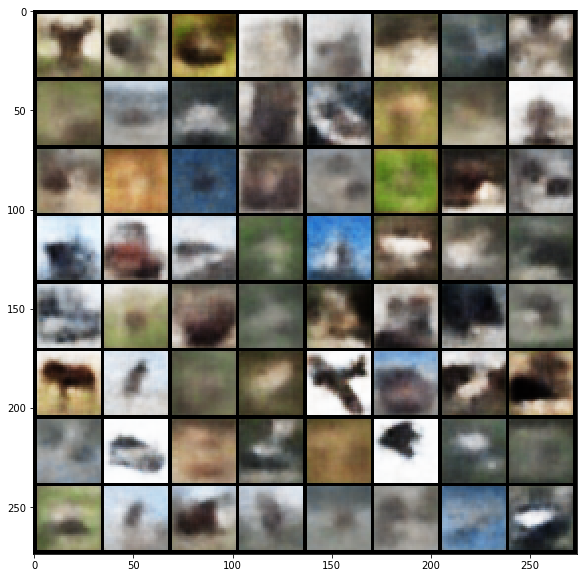

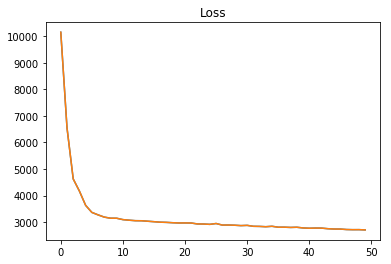

In [15]:
losses = vae.run(model, trn_loader, criterion, optimizer, epochs=50)
utils.plot_metric(losses, losses, 'Loss')